<a href="https://colab.research.google.com/github/pasdptt/PasdPublicNB/blob/master/Answer_of_Intro2Spark_Dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Spark + import lib + start spark session

In [1]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [95.3 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:13 https://developer.download.nvi

In [2]:
#Get Install the Java Development Kit
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Get Spark lib -- address need to be change according to the current version of Spark: https://downloads.apache.org/spark/
!wget -q http://apache.osuosl.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#Unzip th Spark
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
#install findspark for Python
!pip install -q findspark
#Install extra lib(s)
!pip install -q xlrd
!pip install -q kaggle
!pip install -q kora

#import and set environment for spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import kora
import pandas as pd

import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import *

SPARK_URL = "local[*]"

spark = SparkSession.builder.master(SPARK_URL).getOrCreate()

# Check the pyspark version
import pyspark
print(pyspark.__version__)

3.0.0


# Getting data from Kaggle

You may download data from Kaggle mannually or using auto pipeline like this one.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

#Adding API code here
!kaggle datasets download -d claudiodavi/superhero-set

!unzip /content/superhero-set.zip  && rm /content/superhero-set.zip

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
  0% 0.00/31.7k [00:00<?, ?B/s]
100% 31.7k/31.7k [00:00<00:00, 12.3MB/s]
Archive:  /content/superhero-set.zip
  inflating: heroes_information.csv  
  inflating: super_hero_powers.csv   


In [ ]:
file_path = "./heroes_information.csv"

df_hero_indi = spark.read.options(header="true",inferschema = "true").csv(file_path)

df_hero_indi.show()

+---+-----------------+------+---------+-----------------+----------+------+-----------------+----------+---------+------+
|_c0|             name|Gender|Eye color|             Race|Hair color|Height|        Publisher|Skin color|Alignment|Weight|
+---+-----------------+------+---------+-----------------+----------+------+-----------------+----------+---------+------+
|  0|           A-Bomb|  Male|   yellow|            Human|   No Hair| 203.0|    Marvel Comics|         -|     good| 441.0|
|  1|       Abe Sapien|  Male|     blue|    Icthyo Sapien|   No Hair| 191.0|Dark Horse Comics|      blue|     good|  65.0|
|  2|         Abin Sur|  Male|     blue|          Ungaran|   No Hair| 185.0|        DC Comics|       red|     good|  90.0|
|  3|      Abomination|  Male|    green|Human / Radiation|   No Hair| 203.0|    Marvel Comics|         -|      bad| 441.0|
|  4|          Abraxas|  Male|     blue|    Cosmic Entity|     Black| -99.0|    Marvel Comics|         -|      bad| -99.0|
|  5|    Absorbi

In [ ]:
file_path = "./super_hero_powers.csv"

df_hero_power = spark.read.options(header="true",inferschema = "true").csv(file_path)

df_hero_power.show()

+----------------+-------+-------------------+------------------+---------------------+---------------+----------+-------+-----------------+------+------------+--------------------+------------+--------------+------------------+-----------------+---------+------------+--------------+-----------+---------+------------+-------------+-----------+-------------+---------------+-------+-------------+-------------+---------+--------+-----------+----------+----------------------+-------------------+--------------+----------------------+-----------+-------------+---------------+-----------+------------+-----+------------+-----+------------+------------------+-----------+-------------+--------------------+-----------+----------+---------------+-------+-----------------+--------------------+------------+----------+---------+---------------+--------+---------------+-----------------+------------+---------------+------------+-------+---------------+-----------------+--------------+----------+------

# Querying + Stat test

In [ ]:
df_hero_indi.count()

734

In [ ]:
df_hero_indi.select("Race").show()

+-----------------+
|             Race|
+-----------------+
|            Human|
|    Icthyo Sapien|
|          Ungaran|
|Human / Radiation|
|    Cosmic Entity|
|            Human|
|                -|
|            Human|
|                -|
|            Human|
|                -|
|                -|
|           Cyborg|
|                -|
|            Human|
|                -|
|            Human|
|  Xenomorph XX121|
|                -|
|          Android|
+-----------------+
only showing top 20 rows



In [ ]:
df_hero_indi.select("Race").distinct().show()

+------------------+
|              Race|
+------------------+
|          Neyaphem|
|          Symbiote|
|        Kryptonian|
|           Ungaran|
|           Martian|
|         Strontian|
| Human / Radiation|
|   Kakarantharaian|
|         Metahuman|
|Dathomirian Zabrak|
|    Human / Cosmic|
|   Xenomorph XX121|
|            Animal|
|       Frost Giant|
|            Cyborg|
|           Inhuman|
|     God / Eternal|
|    Yoda's species|
|     Icthyo Sapien|
|            Rodian|
+------------------+
only showing top 20 rows



In [ ]:
df_hero_indi.filter(col("Race")=="Cyborg").show()

+---+----------------+------+---------+------+----------+------+-----------------+----------+---------+------+
|_c0|            name|Gender|Eye color|  Race|Hair color|Height|        Publisher|Skin color|Alignment|Weight|
+---+----------------+------+---------+------+----------+------+-----------------+----------+---------+------+
| 12|            Ajax|  Male|    brown|Cyborg|     Black| 193.0|    Marvel Comics|         -|      bad|  90.0|
| 86|    Bionic Woman|Female|     blue|Cyborg|     Black| -99.0|             null|         -|     good| -99.0|
|193|          Cyborg|  Male|    brown|Cyborg|     Black| 198.0|        DC Comics|         -|     good| 173.0|
|194| Cyborg Superman|  Male|     blue|Cyborg|     Black| -99.0|        DC Comics|         -|      bad| -99.0|
|207|     Darth Vader|  Male|   yellow|Cyborg|   No Hair| 198.0|     George Lucas|         -|      bad| 135.0|
|214|        Deathlok|  Male|    brown|Cyborg|      Grey| 193.0|    Marvel Comics|         -|     good| 178.0|
|

In [ ]:
from pyspark.sql.functions import col, countDistinct

df_hero_indi.agg(countDistinct(col("Race"))).show()

+-----------+
|count(Race)|
+-----------+
|         62|
+-----------+



In [ ]:
from pyspark.sql.functions import col, countDistinct

df_hero_indi.agg(*(countDistinct(col(c)).alias(c) for c in df_hero_indi.columns)).show()

+---+----+------+---------+----+----------+------+---------+----------+---------+------+
|_c0|name|Gender|Eye color|Race|Hair color|Height|Publisher|Skin color|Alignment|Weight|
+---+----+------+---------+----+----------+------+---------+----------+---------+------+
|734| 715|     3|       23|  62|        30|    54|       24|        17|        4|   135|
+---+----+------+---------+----+----------+------+---------+----------+---------+------+



In [ ]:
from pyspark.sql import functions as F

df_hero_indi.agg(F.min(col("Weight"))\
              ,F.max(col("Weight"))\
              ,F.avg(col("Weight"))\
              ,F.sum(col("Weight"))\
              ,F.stddev(col("Weight")))\
              .show()

+-----------+-----------+----------------+-----------+-------------------+
|min(Weight)|max(Weight)|     avg(Weight)|sum(Weight)|stddev_samp(Weight)|
+-----------+-----------+----------------+-----------+-------------------+
|      -99.0|      900.0|43.8551912568306|    32102.0| 130.82373271995195|
+-----------+-----------+----------------+-----------+-------------------+



## Finding Median
http://infolab.stanford.edu/~datar/courses/cs361a/papers/quantiles.pdf

In [ ]:
df_hero_indi.approxQuantile("weight", [0.5], 0.0)

[62.0]

## "Null" **checking**

In [ ]:
df_hero_indi.filter(col("Weight").isNull()).show()

+---+---------+------+---------+------+----------+------+---------+----------+---------+------+
|_c0|     name|Gender|Eye color|  Race|Hair color|Height|Publisher|Skin color|Alignment|Weight|
+---+---------+------+---------+------+----------+------+---------+----------+---------+------+
|286| Godzilla|     -|        -| Kaiju|         -| 108.0|     null|      grey|      bad|  null|
|389|King Kong|  Male|   yellow|Animal|     Black|  30.5|     null|         -|     good|  null|
+---+---------+------+---------+------+----------+------+---------+----------+---------+------+



## Group by

In [ ]:
df_hero_indi.groupBy("Race").count().show()

+------------------+-----+
|              Race|count|
+------------------+-----+
|          Neyaphem|    1|
|          Symbiote|    9|
|        Kryptonian|    7|
|           Ungaran|    1|
|           Martian|    1|
|         Strontian|    1|
| Human / Radiation|   11|
|   Kakarantharaian|    1|
|         Metahuman|    2|
|Dathomirian Zabrak|    1|
|    Human / Cosmic|    2|
|   Xenomorph XX121|    1|
|            Animal|    4|
|       Frost Giant|    2|
|            Cyborg|   11|
|           Inhuman|    4|
|     God / Eternal|   14|
|    Yoda's species|    1|
|     Icthyo Sapien|    1|
|            Rodian|    1|
+------------------+-----+
only showing top 20 rows



In [ ]:
df_hero_indi.groupBy(""

In [ ]:
from pyspark.sql import functions as F

df_hero_indi.groupby(col("Gender")).agg(F.min(col("Weight"))\
              ,F.max(col("Weight"))\
              ,F.avg(col("Weight"))\
              ,F.sum(col("Weight"))\
              ,F.stddev(col("Weight")))\
              .show()

+------+-----------+-----------+------------------+-----------+-------------------+
|Gender|min(Weight)|max(Weight)|       avg(Weight)|sum(Weight)|stddev_samp(Weight)|
+------+-----------+-----------+------------------+-----------+-------------------+
|Female|      -99.0|      630.0|            27.265|     5453.0| 103.64800683856899|
|     -|      -99.0|      383.0|14.821428571428571|      415.0|  137.7515351991964|
|  Male|      -99.0|      900.0|52.051587301587304|    26234.0| 139.21298711960654|
+------+-----------+-----------+------------------+-----------+-------------------+



In [ ]:
df_hero_weight = df_hero_indi.filter(col("Weight")!=-99).select("weight")
df_hero_weight.show()

+------+
|weight|
+------+
| 441.0|
|  65.0|
|  90.0|
| 441.0|
| 122.0|
|  88.0|
|  61.0|
|  81.0|
| 104.0|
| 108.0|
|  90.0|
|  90.0|
|  72.0|
| 169.0|
| 173.0|
| 101.0|
|  68.0|
|  57.0|
|  54.0|
|  83.0|
+------+
only showing top 20 rows



In [ ]:
df_hero_weight.agg(F.min(col("Weight"))\
              ,F.max(col("Weight"))\
              ,F.avg(col("Weight"))\
              ,F.sum(col("Weight"))\
              ,F.stddev(col("Weight")))\
              .show()

+-----------+-----------+------------------+-----------+-------------------+
|min(Weight)|max(Weight)|       avg(Weight)|sum(Weight)|stddev_samp(Weight)|
+-----------+-----------+------------------+-----------+-------------------+
|        2.0|      900.0|112.25252525252525|    55565.0| 104.15114206482691|
+-----------+-----------+------------------+-----------+-------------------+



In [ ]:
weight_histogram = df_hero_weight.rdd.flatMap(lambda x: x).histogram(11)

print(weight_histogram)


([2.0, 83.63636363636364, 165.27272727272728, 246.90909090909093, 328.54545454545456, 410.1818181818182, 491.81818181818187, 573.4545454545455, 655.0909090909091, 736.7272727272727, 818.3636363636364, 900.0], [262, 163, 34, 13, 10, 6, 1, 3, 0, 1, 2])


(Using Pandas and plot for showing graph)

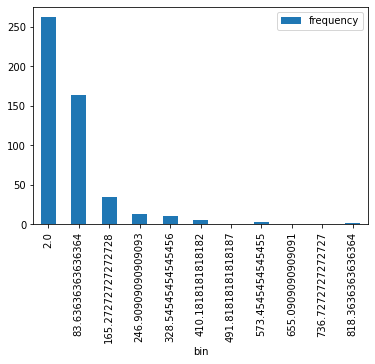

In [ ]:
pd.DataFrame(
    list(zip(*weight_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

## Joinning (yes, same as join in SQL)

In [ ]:
#Rename to match
df_power = df_hero_power.withColumnRenamed("hero_names","name")

df_power.show()

+----------------+-------+-------------------+------------------+---------------------+---------------+----------+-------+-----------------+------+------------+--------------------+------------+--------------+------------------+-----------------+---------+------------+--------------+-----------+---------+------------+-------------+-----------+-------------+---------------+-------+-------------+-------------+---------+--------+-----------+----------+----------------------+-------------------+--------------+----------------------+-----------+-------------+---------------+-----------+------------+-----+------------+-----+------------+------------------+-----------+-------------+--------------------+-----------+----------+---------------+-------+-----------------+--------------------+------------+----------+---------+---------------+--------+---------------+-----------------+------------+---------------+------------+-------+---------------+-----------------+--------------+----------+------

In [ ]:
df_joined = df_hero_indi.join(df_power, on="name",how="left")
df_joined.show()

+-----------------+---+------+---------+-----------------+----------+------+-----------------+----------+---------+------+-------+-------------------+------------------+---------------------+---------------+----------+-------+-----------------+------+------------+--------------------+------------+--------------+------------------+-----------------+---------+------------+--------------+-----------+---------+------------+-------------+-----------+-------------+---------------+-------+-------------+-------------+---------+--------+-----------+----------+----------------------+-------------------+--------------+----------------------+-----------+-------------+---------------+-----------+------------+-----+------------+-----+------------+------------------+-----------+-------------+--------------------+-----------+----------+---------------+-------+-----------------+--------------------+------------+----------+---------+---------------+--------+---------------+-----------------+------------

# Basic Transformation

## New conditional column

Due to WORM (write once read many) so normally we will not alter df, we would add with new column

In [ ]:
from pyspark.sql.functions import col, expr, when

new_column = F.when(col("Race")=="-","null").otherwise(col("Race"))

df_test_nc = df_hero_indi.withColumn("clean_Race",new_column)
df_test_nc.show()

+---+-----------------+------+---------+-----------------+----------+------+-----------------+----------+---------+------+-----------------+
|_c0|             name|Gender|Eye color|             Race|Hair color|Height|        Publisher|Skin color|Alignment|Weight|       clean_Race|
+---+-----------------+------+---------+-----------------+----------+------+-----------------+----------+---------+------+-----------------+
|  0|           A-Bomb|  Male|   yellow|            Human|   No Hair| 203.0|    Marvel Comics|         -|     good| 441.0|            Human|
|  1|       Abe Sapien|  Male|     blue|    Icthyo Sapien|   No Hair| 191.0|Dark Horse Comics|      blue|     good|  65.0|    Icthyo Sapien|
|  2|         Abin Sur|  Male|     blue|          Ungaran|   No Hair| 185.0|        DC Comics|       red|     good|  90.0|          Ungaran|
|  3|      Abomination|  Male|    green|Human / Radiation|   No Hair| 203.0|    Marvel Comics|         -|      bad| 441.0|Human / Radiation|
|  4|        

Apply same concept to clean null

In [ ]:
from pyspark.sql.functions import col, expr, when

new_column = F.when(col("weight").isNull(),-99).otherwise(col("weight"))

df_test_nc = df_hero_indi.withColumn("clean_weight1",new_column)
df_test_nc.show()

+---+-----------------+------+---------+-----------------+----------+------+-----------------+----------+---------+------+-------------+
|_c0|             name|Gender|Eye color|             Race|Hair color|Height|        Publisher|Skin color|Alignment|Weight|clean_weight1|
+---+-----------------+------+---------+-----------------+----------+------+-----------------+----------+---------+------+-------------+
|  0|           A-Bomb|  Male|   yellow|            Human|   No Hair| 203.0|    Marvel Comics|         -|     good| 441.0|        441.0|
|  1|       Abe Sapien|  Male|     blue|    Icthyo Sapien|   No Hair| 191.0|Dark Horse Comics|      blue|     good|  65.0|         65.0|
|  2|         Abin Sur|  Male|     blue|          Ungaran|   No Hair| 185.0|        DC Comics|       red|     good|  90.0|         90.0|
|  3|      Abomination|  Male|    green|Human / Radiation|   No Hair| 203.0|    Marvel Comics|         -|      bad| 441.0|        441.0|
|  4|          Abraxas|  Male|     blue| 

## UDF: User defined function(s)
Spark does not support direct calculation to each cell values so there is some reway to do calculation, in distribution mode.

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import udf

def lbs2kg(lbs):
    return lbs*0.4536

lbs2kg_udf = udf(lbs2kg, FloatType())
df_test = df_hero_indi.withColumn('weight_in_kg',lbs2kg_udf(df_hero_indi["weight"]))
df_test.show()

+---+-----------------+------+---------+-----------------+----------+------+-----------------+----------+---------+------+------------+
|_c0|             name|Gender|Eye color|             Race|Hair color|Height|        Publisher|Skin color|Alignment|Weight|weight_in_kg|
+---+-----------------+------+---------+-----------------+----------+------+-----------------+----------+---------+------+------------+
|  0|           A-Bomb|  Male|   yellow|            Human|   No Hair| 203.0|    Marvel Comics|         -|     good| 441.0|    200.0376|
|  1|       Abe Sapien|  Male|     blue|    Icthyo Sapien|   No Hair| 191.0|Dark Horse Comics|      blue|     good|  65.0|      29.484|
|  2|         Abin Sur|  Male|     blue|          Ungaran|   No Hair| 185.0|        DC Comics|       red|     good|  90.0|      40.824|
|  3|      Abomination|  Male|    green|Human / Radiation|   No Hair| 203.0|    Marvel Comics|         -|      bad| 441.0|    200.0376|
|  4|          Abraxas|  Male|     blue|    Cosm

## Binarizer

In [ ]:
from pyspark.ml.feature import Binarizer

binarizer = Binarizer(threshold=112.25, inputCol="Weight", outputCol="binarized_weight")
binarizedDataFrame = binarizer.transform(df_hero_indi)
binarizedDataFrame.show()

+---+-----------------+------+---------+-----------------+----------+------+-----------------+----------+---------+------+----------------+
|_c0|             name|Gender|Eye color|             Race|Hair color|Height|        Publisher|Skin color|Alignment|Weight|binarized_weight|
+---+-----------------+------+---------+-----------------+----------+------+-----------------+----------+---------+------+----------------+
|  0|           A-Bomb|  Male|   yellow|            Human|   No Hair| 203.0|    Marvel Comics|         -|     good| 441.0|             1.0|
|  1|       Abe Sapien|  Male|     blue|    Icthyo Sapien|   No Hair| 191.0|Dark Horse Comics|      blue|     good|  65.0|             0.0|
|  2|         Abin Sur|  Male|     blue|          Ungaran|   No Hair| 185.0|        DC Comics|       red|     good|  90.0|             0.0|
|  3|      Abomination|  Male|    green|Human / Radiation|   No Hair| 203.0|    Marvel Comics|         -|      bad| 441.0|             1.0|
|  4|          Abrax

## Quatile / Percentile

In [ ]:
bounds = {
    c: dict(
        zip(["q1", "q3"], df_hero_weight.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in df_hero_weight.columns
}

print(bounds)

{'weight': {'q1': 61.0, 'q3': 108.0}}


Using quatile to check outlier

In [ ]:
for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)
print(bounds)

{'weight': {'q1': 61.0, 'q3': 108.0, 'lower': -9.5, 'upper': 178.5}}


In [ ]:
import pyspark.sql.functions as f
df_hero_weight.select(
    "*",
    *[
        f.when(
            f.col(c).between(bounds[c]['lower'], bounds[c]['upper']),
            0
        ).otherwise(1).alias(c+"_out") 
        for c in df_hero_weight.columns
    ]
).show()

+------+----------+
|weight|weight_out|
+------+----------+
| 441.0|         1|
|  65.0|         0|
|  90.0|         0|
| 441.0|         1|
| 122.0|         0|
|  88.0|         0|
|  61.0|         0|
|  81.0|         0|
| 104.0|         0|
| 108.0|         0|
|  90.0|         0|
|  90.0|         0|
|  72.0|         0|
| 169.0|         0|
| 173.0|         0|
| 101.0|         0|
|  68.0|         0|
|  57.0|         0|
|  54.0|         0|
|  83.0|         0|
+------+----------+
only showing top 20 rows



Advanced solution for percentile / quatile

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType
from pyspark.sql import DataFrameStatFunctions as statFunc
import numpy as np

from pyspark.sql import Column
from pyspark.sql.window import Window
from pyspark.sql.functions import *
from pyspark.sql.types import *
import ast


class Discretize:
    @staticmethod
    def threshold_index(col_val, threshold: Column, threshold_str: bool = False):
        if threshold_str:
            # convert list that represent as string to normal list
            threshold = ast.literal_eval(threshold)
        for i, val_i in enumerate(threshold):
            current = threshold[i]
            if i > 0:
                previous = threshold[i - 1]
                if col_val > previous and col_val <= current:
                    result = int(i)
                elif col_val > previous and col_val > current:
                    # for threshold cutoff (extend positive limit bound)
                    result = int(i) + 1
            if i == 0 and col_val <= current:
                result = int(i)
        return result

    @staticmethod
    def human_score(x, y):
        return (int(y) - int(x))

    @staticmethod
    def indexer(df_in, columnname, x, output_name, invert: bool = True):

        threshold_index_udf = udf(Discretize.threshold_index, IntegerType())
        human_score_udf = udf(Discretize.human_score, IntegerType())

        index = list(np.linspace(1. / x, 1, x))
        pthvalue = statFunc(df_in).approxQuantile(columnname, index, 0.0)  # get list of cutoff nth //
        df_out = df_in.withColumn("pth", array([lit(df_in) for df_in in pthvalue]))
        df_out = df_out.withColumn('ranking', threshold_index_udf(columnname, "pth"))
        if invert:
            df_out = df_out.withColumn("maxpth", lit(x))
            df_out = df_out.withColumn(output_name, col("maxpth") - col("ranking")).drop("maxpth")
        else:
            df_out = df_out.withColumn(output_name, lit("ranking"))
        df_out = df_out.drop("pth")
        return df_out

In [ ]:
output_data=Discretize.indexer(df_hero_weight,"Weight",100,"Percnetile_weight")
output_data.show()

+------+-------+-----------------+
|weight|ranking|Percnetile_weight|
+------+-------+-----------------+
| 441.0|     97|                3|
|  65.0|     28|               72|
|  90.0|     59|               41|
| 441.0|     97|                3|
| 122.0|     79|               21|
|  88.0|     56|               44|
|  61.0|     23|               77|
|  81.0|     46|               54|
| 104.0|     72|               28|
| 108.0|     74|               26|
|  90.0|     59|               41|
|  90.0|     59|               41|
|  72.0|     34|               66|
| 169.0|     86|               14|
| 173.0|     87|               13|
| 101.0|     69|               31|
|  68.0|     30|               70|
|  57.0|     17|               83|
|  54.0|      9|               91|
|  83.0|     50|               50|
+------+-------+-----------------+
only showing top 20 rows



## Numerical to categorical

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

lookup = spark.createDataFrame(
    [(-100.0,0.000,"NA"),
     (0.001,50.00,"0-50 Lbs"),
     (50.00,100.00,"51-100 Lbs"),
     (100.00,200.00,"101-200 Lbs"),
     (200.00,300.00,"201-300 Lbs"),
     (300.00,400.00,"301-400 Lbs"),
     (400.00,500.00,"401-500 Lbs"),
     (500.00,600.00,"501-600 Lbs"),
     (600.00,1000.00,"600+ Lbs")],
    ("b","t","weight_grp"))
    
df_test_grp = df_hero_indi\
    .join(lookup,[F.col("weight")>=F.col("b"),F.col("weight") < F.col("t")],"leftouter")
  
df_test_grp.groupby("weight_grp").count().orderBy("weight_grp").show()

+-----------+-----+
| weight_grp|count|
+-----------+-----+
|       null|    2|
|   0-50 Lbs|   19|
|101-200 Lbs|   98|
|201-300 Lbs|   23|
|301-400 Lbs|   13|
|401-500 Lbs|    9|
| 51-100 Lbs|  327|
|   600+ Lbs|    6|
|         NA|  237|
+-----------+-----+



In [ ]:
df_test_grp2 = df_test_nc\
    .join(lookup,[F.col("clean_weight1")>=F.col("b"),F.col("clean_weight1") < F.col("t")],"leftouter")
  
df_test_grp2.groupby("weight_grp").count().orderBy("weight_grp").show()

+-----------+-----+
| weight_grp|count|
+-----------+-----+
|   0-50 Lbs|   19|
|101-200 Lbs|   98|
|201-300 Lbs|   23|
|301-400 Lbs|   13|
|401-500 Lbs|    9|
| 51-100 Lbs|  327|
|   600+ Lbs|    6|
|         NA|  239|
+-----------+-----+



## Standardization

In [ ]:
from pyspark.mllib.util import MLUtils
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="Weight", outputCol="scaled_weight",
                        withStd=True, withMean=False)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(df_hero_indi)

# Normalize each feature to have unit standard deviation.
scaledData = scalerModel.transform(df_hero_indi)
scaledData.show()

More reading: https://spark.apache.org/docs/1.4.1/ml-features.html

#Lab

Try to utilize spark as much as possible

## Ingest data

Data set: [here](https://www.kaggle.com/mashlyn/online-retail-ii-uci)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

#Adding API code here
!kaggle datasets download -d mashlyn/online-retail-ii-uci

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
 62% 9.00M/14.5M [00:01<00:01, 5.26MB/s]
100% 14.5M/14.5M [00:01<00:00, 10.0MB/s]


In [4]:
!unzip /content/online-retail-ii-uci.zip && rm /content/online-retail-ii-uci.zip

Archive:  /content/online-retail-ii-uci.zip
  inflating: online_retail_II.csv    


## Data Description

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, 
non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. 
Many customers of the company are wholesalers.

Attribute Information:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

### 1. Explore the Data: Check NULL values, Check for outliers, and highlight



In [5]:
#code here
file_path = "/content/online_retail_II.csv"

df_retail = spark.read.options(header="true",inferschema = "true").csv(file_path)

df_retail.show()

+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|        InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|2009-12-01 07:45:00| 6.95|    13085.0|United Kingdom|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|2009-12-01 07:45:00| 6.75|    13085.0|United Kingdom|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|2009-12-01 07:45:00| 6.75|    13085.0|United Kingdom|
| 489434|    22041|"RECORD FRAME 7""...|      48|2009-12-01 07:45:00|  2.1|    13085.0|United Kingdom|
| 489434|    21232|STRAWBERRY CERAMI...|      24|2009-12-01 07:45:00| 1.25|    13085.0|United Kingdom|
| 489434|    22064|PINK DOUGHNUT TRI...|      24|2009-12-01 07:45:00| 1.65|    13085.0|United Kingdom|
| 489434|    21871| SAVE THE PLANET MUG|      24|2009-12-01 07:45:00| 1.2

In [12]:
from pyspark.sql.functions import isnan, when, count, col

df_retail.select([count(when(isnan(c), c)).alias(c) for c in df_retail.columns]).show()

+-------+---------+-----------+--------+-----------+-----+-----------+-------+
|Invoice|StockCode|Description|Quantity|InvoiceDate|Price|Customer ID|Country|
+-------+---------+-----------+--------+-----------+-----+-----------+-------+
|      0|        0|          0|       0|          0|    0|          0|      0|
+-------+---------+-----------+--------+-----------+-----+-----------+-------+



In [13]:
df_retail.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_retail.columns]).show()

+-------+---------+-----------+--------+-----------+-----+-----------+-------+
|Invoice|StockCode|Description|Quantity|InvoiceDate|Price|Customer ID|Country|
+-------+---------+-----------+--------+-----------+-----+-----------+-------+
|      0|        0|       4382|       0|          0|    0|     243007|      0|
+-------+---------+-----------+--------+-----------+-----+-----------+-------+



## For all questions, assume the current date is 10/12/2011

### 2. Find an average basket size of customer in each country in the year 2010

#### Basket size = Total Sales Amount / Total Number of Invoices

Hint: df.select(to_date(df.STRING_COLUMN).alias('new_date')).show()



In [19]:
from pyspark.sql.functions import *

df_retail=df_retail.withColumn("date",to_date(df_retail.InvoiceDate))\
  .withColumn("Year",year(df_retail.InvoiceDate))\
  .withColumn("Month",month(df_retail.InvoiceDate))\
  .withColumn("Day",dayofmonth(df_retail.InvoiceDate))\
  .withColumn("Week_number",weekofyear(df_retail.InvoiceDate))\
  .withColumn("totalSales",bround(df_retail.Quantity*df_retail.Price,2))
  
df_retail.show()



+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+----------+----+-----+---+----------+-----------+
|Invoice|StockCode|         Description|Quantity|        InvoiceDate|Price|Customer ID|       Country|      date|Year|Month|Day|totalSales|Week_number|
+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+----------+----+-----+---+----------+-----------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|2009-12-01 07:45:00| 6.95|    13085.0|United Kingdom|2009-12-01|2009|   12|  1|      83.4|         49|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|2009-12-01 07:45:00| 6.75|    13085.0|United Kingdom|2009-12-01|2009|   12|  1|      81.0|         49|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|2009-12-01 07:45:00| 6.75|    13085.0|United Kingdom|2009-12-01|2009|   12|  1|      81.0|         49|
| 489434|    22041|"RECORD FRAME 7""...|      48|2009-12-01 07:45:00|  2.1|    13085.0|U

In [37]:
df_retail_2010 = df_retail.filter(df_retail.Year==2010)

df_retail_2010.show()

+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+----------+----+-----+---+----------+
|Invoice|StockCode|         Description|Quantity|        InvoiceDate|Price|Customer ID|       Country|      date|Year|Month|Day|totalSales|
+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+----------+----+-----+---+----------+
| 493410|  TEST001|This is a test pr...|       5|2010-01-04 09:24:00|  4.5|    12346.0|United Kingdom|2010-01-04|2010|    1|  4|      22.5|
|C493411|    21539|RETRO SPOTS BUTTE...|      -1|2010-01-04 09:43:00| 4.25|    14590.0|United Kingdom|2010-01-04|2010|    1|  4|     -4.25|
| 493412|  TEST001|This is a test pr...|       5|2010-01-04 09:53:00|  4.5|    12346.0|United Kingdom|2010-01-04|2010|    1|  4|      22.5|
| 493413|    21724|PANDA AND BUNNIES...|       1|2010-01-04 09:54:00| 0.85|       null|United Kingdom|2010-01-04|2010|    1|  4|      0.85|
| 493413|    84578|E

In [45]:
customer_2010 = df_retail_2010.groupBy("Customer ID","Country").agg(sum('totalSales').alias('totalSales'),countDistinct('Invoice').alias('Invoice'))
customer_2010 = customer_2010.withColumn("Basket_size",bround(customer_2010.totalSales/customer_2010.Invoice,2))

customer_2010.show()

+-----------+--------------+------------------+-------+-----------+
|Customer ID|       Country|        totalSales|Invoice|Basket_size|
+-----------+--------------+------------------+-------+-----------+
|    15224.0|United Kingdom|            837.26|      8|     104.66|
|    17428.0|United Kingdom|11848.940000000002|     16|     740.56|
|    17268.0|United Kingdom|            814.55|      6|     135.76|
|    12720.0|       Germany|           2973.73|     15|     198.25|
|    18075.0|United Kingdom|           3229.59|     19|     169.98|
|    13557.0|United Kingdom|1982.5199999999998|     12|     165.21|
|    13818.0|United Kingdom|             61.28|      1|      61.28|
|    15140.0|United Kingdom|            889.44|      1|     889.44|
|    14623.0|United Kingdom|           1161.48|      6|     193.58|
|    15603.0|United Kingdom|             26.25|      2|      13.12|
|    17960.0|United Kingdom|61.300000000000004|      2|      30.65|
|    14947.0|United Kingdom|            758.97| 

In [55]:
temp = customer_2010.groupBy("Country").agg(avg("Basket_size").alias("Basket_size"))
temp.sort(temp.Basket_size.desc()).show(50)

+--------------------+------------------+
|             Country|       Basket_size|
+--------------------+------------------+
|            Thailand|           1535.27|
|             Bermuda|           1253.14|
|             Denmark|1251.3477777777778|
|              Israel|1230.7350000000001|
|           Lithuania|           1092.29|
|         Switzerland|1052.7164285714287|
|             Iceland|           1017.55|
|           Singapore|           1009.44|
|              Greece|            1003.3|
|               Japan| 996.8785714285715|
|                 RSA|            704.93|
|              Norway|          703.1875|
|           Hong Kong|            653.71|
|                EIRE| 613.4716666666667|
|              Canada|            608.33|
|              Cyprus|         582.83875|
|United Arab Emirates|          579.3025|
|              Sweden|        549.349375|
|         West Indies|            536.41|
|               Korea|            474.91|
|             Germany| 469.6037142

###  3. Does the basket size in each country change over time? Which country has the highest growth in terms of both sales amount and basket size in the past 6 months?

In [14]:
customer_profile = df_retail.groupBy("Customer ID","Country","Year","Month")\
  .agg(sum('totalSales').alias('totalSales'),countDistinct('Invoice').alias('Invoice'))
customer_profile = customer_profile.withColumn("Basket_size",bround(customer_profile.totalSales/customer_profile.Invoice,2))
customer_profile = customer_profile.groupBy("Year","Month","Country")\
  .agg(avg('Basket_size').alias('Basket_size'),sum('totalSales').alias('totalSales'),count('Customer ID').alias('Number_of_customers'))

customer_profile.sort(customer_profile.Year).show()

+----+-----+--------------------+------------------+------------------+-------------------+
|Year|Month|             Country|       Basket_size|        totalSales|Number_of_customers|
+----+-----+--------------------+------------------+------------------+-------------------+
|2009|   12|     Channel Islands|            472.69|            945.38|                  1|
|2009|   12|         Netherlands|          1723.775|15204.730000000001|                  2|
|2009|   12|               Italy|199.10000000000002|398.20000000000005|                  2|
|2009|   12|              Poland|            371.82|371.82000000000005|                  1|
|2009|   12|               Japan|           -208.75|           -208.75|                  1|
|2009|   12|            Portugal|           1410.79|           2821.58|                  2|
|2009|   12|              Sweden|             129.9|             259.8|                  1|
|2009|   12|           Australia| 20.87333333333333|             50.25|         

In [18]:
country_profile_p6m = customer_profile.filter((customer_profile.Year==2011) & (customer_profile.Month>=7))

country_pv_6m = country_profile_p6m.groupBy("Country").pivot("Month").agg(bround(avg("Basket_size"),2)).fillna(0)

country_pv_6m.sort(country_pv_6m.Country).show()

+------------------+-------+-------+-------+-------+-------+-------+
|           Country|      7|      8|      9|     10|     11|     12|
+------------------+-------+-------+-------+-------+-------+-------+
|         Australia| 622.82|11244.6| 585.14|4287.63| 624.73|    0.0|
|           Austria| 595.98| 758.04|    0.0|1043.78| 664.89|  683.2|
|           Belgium| 403.58| 356.41| 524.73|  463.2| 539.11| 281.89|
|            Canada| 884.29|  51.56|    0.0|    0.0|    0.0|    0.0|
|   Channel Islands|    0.0| 970.13| 395.82| 509.08| 319.74|  97.08|
|            Cyprus|    0.0|    0.0| 196.35|1054.13| 460.89| -91.25|
|    Czech Republic|    0.0|    0.0|    0.0| 277.48| -30.76|    0.0|
|           Denmark| 376.24|   39.3|1523.39| 388.25|1349.78|  168.9|
|              EIRE|1708.12| 484.65|1132.32| 667.72| 548.75| 435.49|
|European Community|  676.8|    0.0|    0.0|    0.0|    0.0|    0.0|
|           Finland| 998.91| 342.89| 276.36| 477.25| 374.95| 307.67|
|            France| 464.34|  507.

### 4. Monitor weekly sales and visit by country, Past 1 week, Past 2 weeks, Past 4 weeks, Year-to-date
#### Create a report that includes the following columns:
- Country
- Number of Customers in past 1 week
- Number of Customers in past 2 weeks
- Number of Customers in past 4 weeks
- Number of Customers accumulated since 01/01/2011
- Sales amount in past 1 week
- Sales amount in past 2 weeks
- Sales amount in past 4 weeks
- Sales amount since 01/01/2011
- Number of Invoices in past 1 week
- Number of Invoices in past 2 weeks
- Number of Invoices in past 4 weeks
- Number of Invoices since 01/01/2011

In [20]:
customer_profile = df_retail.groupBy("Customer ID","Country","Year","Week_number")\
  .agg(sum('totalSales').alias('totalSales'),count('Invoice').alias('Invoice'))
customer_profile = customer_profile.withColumn("Basket_size",bround(customer_profile.totalSales/customer_profile.Invoice,2))
customer_profile = customer_profile.groupBy("Year","Week_number","Country")\
  .agg(sum('Invoice').alias('Number_of_invoice'),sum('totalSales').alias('totalSales'),count('Customer ID').alias('Number_of_customers'))

customer_profile.sort(customer_profile.Year).show()

+----+-----------+--------------+-----------------+------------------+-------------------+
|Year|Week_number|       Country|Number_of_invoice|        totalSales|Number_of_customers|
+----+-----------+--------------+-----------------+------------------+-------------------+
|2009|         50|       Belgium|                1|               8.5|                  1|
|2009|         49|           USA|                1|             141.0|                  1|
|2009|         51|United Kingdom|            13133|229637.57000000015|                380|
|2009|         50|        Sweden|                3|             259.8|                  1|
|2009|         49|        Poland|               22|371.82000000000005|                  1|
|2009|         50|       Finland|                4|            549.08|                  1|
|2009|         51|        Cyprus|              164|2664.3899999999994|                  3|
|2009|         50|        Greece|               41| 610.9499999999999|                  1|

In [25]:
lastweek = customer_profile.filter((customer_profile.Year==2011)).agg(max("Week_number").alias("max")).collect()[0][0]

last4week = lastweek-3
last2week = lastweek-1

In [32]:
# Total customers, invoices and sales by country
past4wk = customer_profile.filter((customer_profile.Year==2011) & (customer_profile.Week_number>=last4week))
past2wk = customer_profile.filter((customer_profile.Year==2011) & (customer_profile.Week_number>=last2week))
past1wk = customer_profile.filter((customer_profile.Year==2011) & (customer_profile.Week_number>=lastweek))


grp_past4wk = past4wk.groupBy("Country").agg(sum('Number_of_invoice').alias('4wk_Number_of_invoice')\
                                             ,sum('totalSales').alias('4wk_totalSales')\
                                             ,sum('Number_of_customers').alias('4wk_Number_of_customers'))
grp_past2wk = past2wk.groupBy("Country").agg(sum('Number_of_invoice').alias('2wk_Number_of_invoice')\
                                             ,sum('totalSales').alias('2wk_totalSales')\
                                             ,sum('Number_of_customers').alias('2wk_Number_of_customers'))
grp_past1wk = past1wk.groupBy("Country").agg(sum('Number_of_invoice').alias('wk_Number_of_invoice')\
                                             ,sum('totalSales').alias('wk_totalSales')\
                                             ,sum('Number_of_customers').alias('wk_Number_of_customers'))

# 2011
year2011 = customer_profile.filter(customer_profile.Year==2011)
grp_2011 = year2011.groupBy("Country").agg(sum('Number_of_invoice').alias('2011_Number_of_invoice')\
                                             ,sum('totalSales').alias('2011_totalSales')\
                                             ,sum('Number_of_customers').alias('2011_Number_of_customers'))

final = grp_past4wk.join(grp_past2wk,"Country","inner").join(grp_past1wk,"Country","inner").join(grp_2011,"Country","inner")

final.sort(final.Country).show()

+---------------+---------------------+------------------+-----------------------+---------------------+------------------+-----------------------+--------------------+------------------+----------------------+----------------------+------------------+------------------------+
|        Country|4wk_Number_of_invoice|    4wk_totalSales|4wk_Number_of_customers|2wk_Number_of_invoice|    2wk_totalSales|2wk_Number_of_customers|wk_Number_of_invoice|     wk_totalSales|wk_Number_of_customers|2011_Number_of_invoice|   2011_totalSales|2011_Number_of_customers|
+---------------+---------------------+------------------+-----------------------+---------------------+------------------+-----------------------+--------------------+------------------+----------------------+----------------------+------------------+------------------------+
|        Austria|                   40|           1426.13|                      2|                    7|             683.2|                      1|                   

### 5. Find the average number of days since last visit of the customer in each country

In [33]:
import datetime

current_day = datetime.datetime(2011, 10, 12)

print (current_day)
print (current_day.day)
print (current_day.month)
print (current_day.year)

2011-10-12 00:00:00
12
10
2011


In [37]:
customer_last_visit = df_retail.groupBy("Country","Customer ID").agg(max("Date").alias("lastvisit"))

customer_last_visit = customer_last_visit.withColumn("n_day_last_vist",\
                                                     datediff(lit(current_day),customer_last_visit.lastvisit))

customer_last_visit.show()

+---------------+-----------+----------+---------------+
|        Country|Customer ID| lastvisit|n_day_last_vist|
+---------------+-----------+----------+---------------+
| United Kingdom|    13623.0|2011-11-09|            -28|
| United Kingdom|    12949.0|2011-11-09|            -28|
|        Germany|    12600.0|2011-11-11|            -30|
| United Kingdom|    14099.0|2011-11-23|            -42|
| United Kingdom|    14625.0|2011-06-07|            127|
| United Kingdom|    17876.0|2010-11-05|            341|
| United Kingdom|    13659.0|2011-05-26|            139|
| United Kingdom|    13773.0|2010-11-08|            338|
| United Kingdom|    13540.0|2010-08-29|            409|
| United Kingdom|    13765.0|2010-02-24|            595|
| United Kingdom|    15742.0|2010-03-30|            561|
|Channel Islands|    14938.0|2010-07-25|            444|
| United Kingdom|    13997.0|2010-07-08|            461|
| United Kingdom|    13745.0|2011-07-11|             93|
| United Kingdom|    17953.0|20

In [39]:
country_avg_last_vist = customer_last_visit.filter(customer_last_visit.n_day_last_vist>=0).groupBy("Country").agg(avg("n_day_last_vist").alias("avg_day_of_last_visit"))

In [40]:
country_avg_last_vist.sort(country_avg_last_vist.Country).show()

+------------------+---------------------+
|           Country|avg_day_of_last_visit|
+------------------+---------------------+
|         Australia|   251.08333333333334|
|           Austria|   228.11111111111111|
|           Bahrain|                194.0|
|           Belgium|                197.2|
|           Bermuda|                573.0|
|            Brazil|                283.0|
|            Canada|                169.6|
|   Channel Islands|                279.8|
|            Cyprus|              312.375|
|           Denmark|   198.28571428571428|
|              EIRE|                448.0|
|European Community|                 83.0|
|           Finland|                273.0|
|            France|   193.11363636363637|
|           Germany|                200.5|
|            Greece|                233.0|
|            Israel|                 97.4|
|             Italy|   309.14285714285717|
|             Japan|                225.0|
|             Korea|                345.0|
+----------